In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

In [7]:
# Use case: GAN for generating handwritten digits (MNIST)

# 1. Load and preprocess data
def load_real_data():
    (x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5) / 127.5  # Normalize to [-1, 1]
    x_train = np.expand_dims(x_train, axis=-1)
    return x_train

In [8]:
# 2. Build the generator
def build_generator(latent_dim):
    model = models.Sequential([
        layers.Dense(128 * 7 * 7, activation="relu", input_dim=latent_dim),
        layers.Reshape((7, 7, 128)),
        layers.UpSampling2D(),
        layers.Conv2D(128, kernel_size=3, padding="same"),
        layers.BatchNormalization(momentum=0.8),
        layers.Activation("relu"),
        layers.UpSampling2D(),
        layers.Conv2D(64, kernel_size=3, padding="same"),
        layers.BatchNormalization(momentum=0.8),
        layers.Activation("relu"),
        layers.Conv2D(1, kernel_size=3, padding="same", activation="tanh")
    ])
    return model


In [9]:
# 3. Build the discriminator
def build_discriminator(img_shape):
    model = models.Sequential([
        layers.Conv2D(64, kernel_size=3, strides=2, input_shape=img_shape, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.25),
        layers.Conv2D(128, kernel_size=3, strides=2, padding="same"),
        layers.ZeroPadding2D(((0,1),(0,1))),
        layers.BatchNormalization(momentum=0.8),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [10]:
# 4. Compile the GAN
def build_gan(generator, discriminator):
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(0.0002, 0.5), metrics=['accuracy'])
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    img = generator(gan_input)
    validity = discriminator(img)
    gan = models.Model(gan_input, validity)
    gan.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(0.0002, 0.5))
    return gan

In [11]:
# 5. Training function
def train_gan(generator, discriminator, gan, data, latent_dim, epochs=10000, batch_size=64, sample_interval=2000):
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, data.shape[0], batch_size)
        real_imgs = data[idx]
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_imgs = generator.predict(noise)
        d_loss_real = discriminator.train_on_batch(real_imgs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        # Train generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, valid)
        # Print progress
        if epoch % sample_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")

In [12]:
# 6. Run the use case
# Make sure to run all previous cells so that load_real_data and other functions are defined

latent_dim = 100
img_shape = (28, 28, 1)
x_train = load_real_data()
generator = build_generator(latent_dim)
discriminator = build_discriminator(img_shape)
gan = build_gan(generator, discriminator)
train_gan(generator, discriminator, gan, x_train, latent_dim, epochs=1000, batch_size=32, sample_interval=200)

C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\backend\tensorflow\trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.6880, acc.: 53.12%] [G loss: 0.6614]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


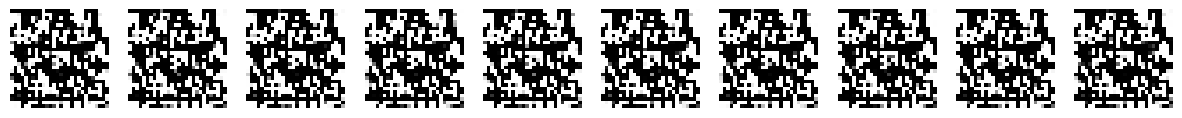

In [13]:
# Generate new images using the trained generator and display them

import matplotlib.pyplot as plt

# Generate random noise
num_samples = 10
noise = np.random.normal(0, 1, (num_samples, latent_dim))

# Generate images
gen_imgs = generator.predict(noise)

# Rescale images from [-1, 1] to [0, 1] for display
gen_imgs = 0.5 * gen_imgs + 0.5

# Plot generated images
plt.figure(figsize=(15, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(gen_imgs[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.show()